<h1>TEAM CW6 Climate Change Experiment</h1>

<h2>Problem statement</h2>

<h5>
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals.
</h5>
<h5>
They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.
 </h5>
 <h5>
With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.
   </h5>
<h5>
Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.
</h5>

<a id="cont"></a>

## Table of Contents

<a href=#one>1.Introduction</a>

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Loading Data</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Data cleaning and Feature Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

<h3> 1.Introduction</h3>


NLP is the study of how computers can interprete and parse human language.
##
##
#
#

<h4>2.Importing Packages</h4>

In [3]:
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set()

<h4>3.Loading Data </h4>

In [4]:
df_train = pd.read_csv('train.csv') # load the data
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [7]:
df_train.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


<h4>4.Exploratory Data Analysis</h4>

In [5]:
# look at data statistics
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [6]:
df_train.shape

(15819, 3)

the given dataset consist of 15819 raws and 3 three columns which are the sentiment,tweetid and messages

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


we have one categorical feature in the given dataset 

In [8]:
#checking null values for the entire dataset
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [ ]:
#checking nulls for each feature


In [ ]:
df_train['sentiment'].isnull().sum()

0

In [ ]:
df_train['message'].isnull().sum()

0

In [ ]:
df_train['tweetid'].isnull().sum()

0

there are no null values in our given dataset

In [36]:
#checking duplicates for the entire dataset
df_train.isnull().sum()


sentiment    0
message      0
tweetid      0
dtype: int64

In [ ]:
#checking duplicates for each feature

In [22]:
df_train['sentiment'].duplicated().sum()

15815

In [23]:
df_train['message'].duplicated().sum()

1590

In [24]:
df_train['tweetid'].duplicated().sum()

0

from checking for duplicates, we observed that there are 15815 duplicates in the sentiment feature and 
that cannot be classified as a problem since our data is based on the the numbers that represent only 
four categories so  the repetition of the unique values cannot be regarded as redundancy

And there are also similar messages coming from different people hence the count of 1590 duplicate messages with 0 duplicates in the tweetid 

In [25]:
#checking for unique values in each feature


In [26]:
df_train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [32]:
df_train['message'].unique()

array(["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",
       "It's not like we lack evidence of anthropogenic global warming",
       'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…',
       ...,
       'notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2',
       'RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦',
       "RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ"],
      dtype=object)

In [33]:
df_train['tweetid'].unique()

array([625221, 126103, 698562, ..., 384248, 819732, 806319], dtype=int64)

Plots

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change


In [47]:
#checking the percentage distribution of each category
display(print("Percentage contribution:\n",df_train.sentiment.value_counts(normalize=True)*100))



Percentage contribution:
  1    53.922498
 2    23.010304
 0    14.874518
-1     8.192680
Name: sentiment, dtype: float64


None

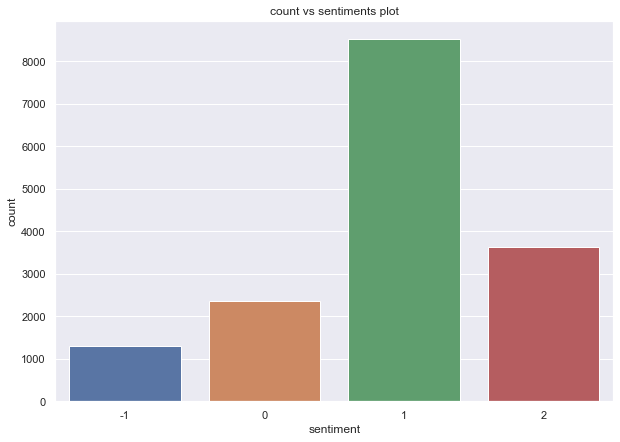

In [64]:
#Creating count plot for the sentiments
sns.set(rc={'figure.figsize':(10,7)})
ax=sns.countplot(x=df_train['sentiment'], data=df_train)
plt.title("count vs sentiments plot")
plt.show()

from the percentage contribution and the plot it can be abserved that Pro(the tweets that  supports the belief of man-made climate change) contribute more than 50% followed by The News with 23% of those that neither support or refute the belief of man made climate change.
Also few people who does not believe in man made climate change.

From all this we can infer that there is an imbalance in the classess that need to be dealt with before modelling

<h4>5.Data cleaning and Feature Engineering</h4>

In [ ]:
#first we convert text data to numeric 